In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
demograpgics = pd.read_csv('datasets/exam-1/demographics.csv')
cc = pd.read_csv('datasets/exam-1/cc.csv')
cc.sort_values(by=['cc_no', 'pos_dt'], inplace=True)
kplus = pd.read_csv('datasets/exam-1/kplus.csv')
kplus.sort_values(by=['id', 'sunday'], inplace=True)
train_set = pd.read_csv('datasets/exam-1/train.csv')
test_set = pd.read_csv('datasets/exam-1/test.csv')

In [10]:
demograpgics.head()

,id,cc_no,gender,ocp_cd,age
0,1,1,2,9.0,5
1,1,98397,2,9.0,5
2,2,2,2,3.0,4
3,2,9740,2,3.0,4
4,3,3,2,1.0,3


In [11]:
cc.head(20)

,cc_no,pos_dt,cc_txn_amt
30680,2,2018-03-10,800
30684,2,2018-03-12,3800
30685,2,2018-04-27,14700
30687,2,2018-04-29,4000
30682,2,2018-05-07,800
30681,2,2018-05-14,800
30686,2,2018-06-04,1000
30683,2,2018-06-11,1000
947320,4,2018-05-11,20000
947338,4,2018-05-11,30000


In [12]:
kplus.head(20)

,id,sunday,kp_txn_count,kp_txn_amt
822506,1,2018-06-03,1,1500
822505,1,2018-06-17,1,2000
100625,2,2018-01-07,2,600
100629,2,2018-01-14,3,3200
100641,2,2018-01-21,2,600
100644,2,2018-01-28,6,3000
100643,2,2018-02-04,4,13700
100627,2,2018-02-11,5,3500
100631,2,2018-02-18,5,2100
100633,2,2018-02-25,1,300


In [13]:
train_set.head()

,id,income
0,1,20000
1,2,106000
2,3,29000
3,4,61000
4,5,18000


In [14]:
test_set.head()

,id
0,50001
1,50002
2,50003
3,50004
4,50005


In [15]:
cc_with_id = pd.merge(cc, demograpgics[['id', 'cc_no']], on='cc_no')
cc_with_id.head()

,cc_no,pos_dt,cc_txn_amt,id
0,2,2018-03-10,800,2
1,2,2018-03-12,3800,2
2,2,2018-04-27,14700,2
3,2,2018-04-29,4000,2
4,2,2018-05-07,800,2


In [16]:
cc_with_id.groupby(['id'])['cc_txn_amt'].count().describe()

count    51467.000000
mean        19.412692
std         26.209876
min          1.000000
25%          4.000000
50%         10.000000
75%         25.000000
max        754.000000
Name: cc_txn_amt, dtype: float64

          id  income
30145  30146   13000


/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


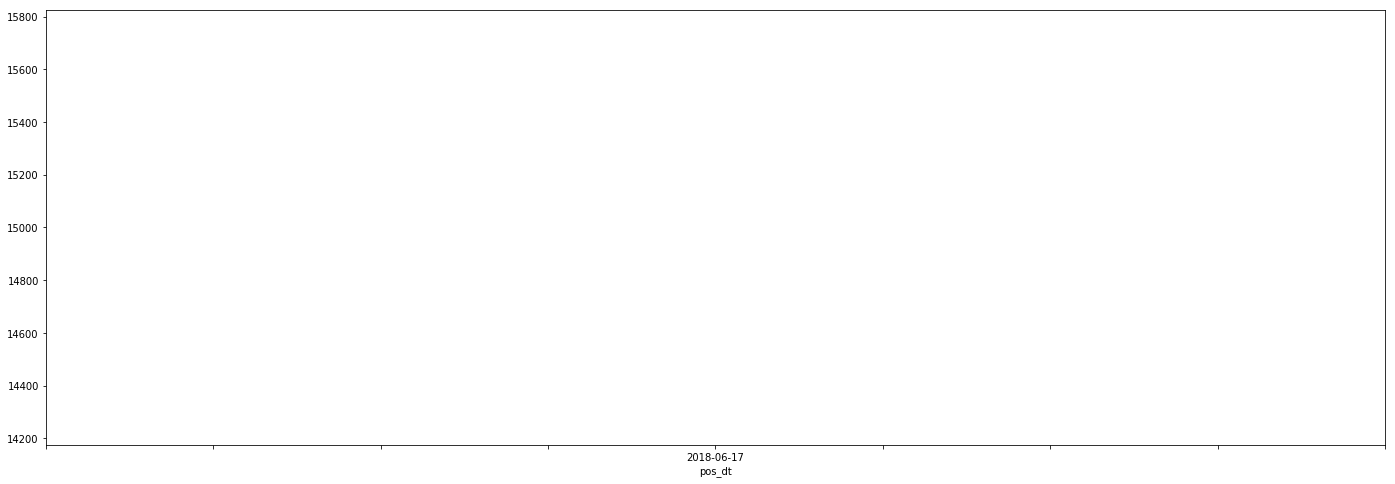

In [17]:
person = train_set.sample(1)
print(person)
cc_with_id[cc_with_id['id'] == person['id'].values[0]].groupby('pos_dt')['cc_txn_amt'].sum().plot(figsize=(24,8))

In [81]:
n_transaction_threshold = 8
train_kplus = kplus[kplus['id'] <= 50000]
grouped = train_kplus.groupby('id')
trainable_ids = grouped.size().keys()[grouped.size() >= n_transaction_threshold]
train_kplus = train_kplus[train_kplus['id'].isin(trainable_ids)]

In [19]:
train_kplus.head()

,id,sunday,kp_txn_count,kp_txn_amt
100625,2,2018-01-07,2,600
100629,2,2018-01-14,3,3200
100641,2,2018-01-21,2,600
100644,2,2018-01-28,6,3000
100643,2,2018-02-04,4,13700


In [20]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.decomposition import PCA
from keras.preprocessing.sequence import pad_sequences

In [119]:
Scaler = StandardScaler

In [120]:
scaler_x = Scaler()
train_kplus[['kp_txn_count', 'kp_txn_amt']] = scaler_x.fit_transform(train_kplus[['kp_txn_count', 'kp_txn_amt']])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [22]:
pca = PCA(n_components=1)
train_kplus['count_amt_pca'] = pca.fit_transform(train_kplus[['kp_txn_count', 'kp_txn_amt']])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
train_kplus.head()

,id,sunday,kp_txn_count,kp_txn_amt,count_amt_pca
100625,2,2018-01-07,0.002217,0.000036,-0.005816
100629,2,2018-01-14,0.004435,0.000221,-0.003707
100641,2,2018-01-21,0.002217,0.000036,-0.005816
100644,2,2018-01-28,0.011086,0.000206,0.002396
100643,2,2018-02-04,0.006652,0.000968,-0.001374


In [207]:
padding_value = float(-100)
max_len = len(kplus.groupby('sunday').groups)
sunday_id_hash = {sunday:i for i, sunday in enumerate(kplus.groupby('sunday', sort=True).groups.keys())}

id_grouped = train_kplus.groupby('id')
accept_ids = pd.Series(list(id_grouped.groups.keys()))

def create_sequence(group):
    origin = sunday_id_hash[group.iloc[0]['sunday']]

    seq = group[['kp_txn_amt', 'kp_txn_count']].to_numpy()
    pre_padding = np.ones((origin ,2), dtype=np.float32) * padding_value
    post_padding = np.ones((max_len - origin - len(seq),2), dtype=np.float32) * padding_value
    return np.concatenate((pre_padding, seq, post_padding), axis=0)
xs = np.array([create_sequence(group) for _, group in id_grouped])

ys = train_set[train_set['id'].isin(accept_ids)]['income'].to_numpy()
income_mean = train_set['income'].mean()
income_std = train_set['income'].std()
# ys = (ys - income_mean) / income_std
# ys = (ys - ys.min()) / ys.max()
scaler_y = Scaler()
ys = np.squeeze(scaler_y.fit_transform(np.expand_dims(ys,axis=2)))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


In [145]:
xs[-1].astype(int)

array([[  800,     1],
       [ 2700,     1],
       [  600,     1],
       [ 1000,     1],
       [ 1000,     1],
       [ 1100,     1],
       [16500,     1],
       [26800,     1],
       [25700,     2],
       [  600,     1],
       [ 1600,     1],
       [11000,     2],
       [10800,     3],
       [ 1000,     1],
       [ 6700,     2],
       [31700,     4],
       [ 3000,     1],
       [14900,     1],
       [ 7000,     1],
       [   -1,    -1],
       [   -1,    -1],
       [   -1,    -1],
       [   -1,    -1],
       [   -1,    -1],
       [   -1,    -1]])

In [80]:
ys[-1]

0.006122448979591837

In [189]:
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, InputLayer, Dropout, BatchNormalization, Reshape, Flatten, Conv1D, AveragePooling1D
from keras.optimizers import Adam, SGD
from keras.callbacks import TensorBoard, Callback
from sklearn.model_selection import train_test_split
from util import modified_SMAPE
from tqdm import tqdm, trange, tnrange

In [274]:
base_activation = 'tanh'
model = Sequential()
model.add(InputLayer((25,2)))
# model.add(BatchNormalization())
# model.add(LSTM(32, return_sequences=True, ))
# model.add(Dropout(0.5))
# model.add(LSTM(32, return_sequences=True))
# model.add(Dropout(0.5))
model.add(GRU(50, activation=base_activation, return_sequences=True))
model.add(GRU(50, activation=base_activation, return_sequences=True))
model.add(Dropout(0.5))
model.add(GRU(25, activation=base_activation, return_sequences=True))
model.add(GRU(25, activation=base_activation, return_sequences=True))
model.add(Dropout(0.5))

model.add(Flatten())
# model.add(Dense(100))
model.add(Dense(1, activation='linear'))

In [233]:
model = Sequential()
base_activation = 'linear'
model.add(Conv1D(32, kernel_size=3, activation=base_activation, input_shape=(25,2)))
model.add(Conv1D(32, kernel_size=3, activation=base_activation))
model.add(Dropout(0.5))
model.add(Conv1D(16, kernel_size=3, activation=base_activation))
model.add(Conv1D(16, kernel_size=3, activation=base_activation))
model.add(Dropout(0.5))
model.add(Conv1D(8, kernel_size=3, activation=base_activation))
model.add(Conv1D(8, kernel_size=3, activation=base_activation))
model.add(Dropout(0.5))
model.add(Conv1D(4, kernel_size=3, activation=base_activation))
model.add(Conv1D(4, kernel_size=3, activation=base_activation))
# model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1, activation='linear'))

In [258]:
model = Sequential()
model.add(InputLayer((25,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [284]:
# opt = SGD(lr=4e-2, momentum=0.1)
opt = Adam()

In [285]:
model.compile(loss='mae', optimizer=opt )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 25, 2)             0         
_________________________________________________________________
gru_117 (GRU)                (None, 25, 50)            7950      
_________________________________________________________________
gru_118 (GRU)                (None, 25, 50)            15150     
_________________________________________________________________
dropout_54 (Dropout)         (None, 25, 50)            0         
_________________________________________________________________
gru_119 (GRU)                (None, 25, 25)            5700      
_________________________________________________________________
gru_120 (GRU)                (None, 25, 25)            3825      
_________________________________________________________________
dropout_55 (Dropout)         (None, 25, 25)            0         
__________

In [267]:
x_train, x_val, y_train, y_val = train_test_split(xs, ys, test_size=0.2)

In [268]:
class EvaluateSMAPE(Callback):
    def __init__(self, xs, ys_true, name, scaler_y=None):
        
#         self.scaler_x = scaler_x
        self.scaler_y = scaler_y
        self.xs = xs
        
        self.ys_true = np.squeeze(scaler_y.inverse_transform(ys_true))
        self.name = name
    def on_epoch_end(self, epoch, logs=None):
        ys_pred = model.predict(self.xs)
        if self.scaler_y is not None:
            ys_pred = np.squeeze(self.scaler_y.inverse_transform(ys_pred))
        score = modified_SMAPE(self.ys_true, ys_pred)
        logs[f'{self.name}-SMAPE'] = score
        print(f'Epoch {epoch+1} | {self.name}-SMAPE: {score}')
        

In [286]:
model.fit(x_train, y_train,
          validation_data=(x_val, y_val),
          shuffle=True,
          batch_size=32,
          callbacks=[EvaluateSMAPE(x_val, y_val, 'val', scaler_y=scaler_y),
                     TensorBoard(log_dir='logs/gruV4')],
          initial_epoch=49,
         epochs=10000)

Train on 27725 samples, validate on 6932 samples
Epoch 50/10000
27725/27725 [==============================] - 43s 2ms/step - loss: 0.4070 - val_loss: 0.4571
Epoch 50 | val-SMAPE: 87.15221654180186
Epoch 51/10000
27725/27725 [==============================] - 38s 1ms/step - loss: 0.4047 - val_loss: 0.4472
Epoch 51 | val-SMAPE: 89.1394895230774
Epoch 52/10000
27725/27725 [==============================] - 38s 1ms/step - loss: 0.4028 - val_loss: 0.4526
Epoch 52 | val-SMAPE: 88.67333321926806
Epoch 53/10000
27725/27725 [==============================] - 38s 1ms/step - loss: 0.4032 - val_loss: 0.4566
Epoch 53 | val-SMAPE: 87.59214888186834
Epoch 54/10000
27725/27725 [==============================] - 38s 1ms/step - loss: 0.4014 - val_loss: 0.4523
Epoch 54 | val-SMAPE: 87.71205892823158
Epoch 55/10000
27725/27725 [==============================] - 38s 1ms/step - loss: 0.3992 - val_loss: 0.4579
Epoch 55 | val-SMAPE: 87.86274694079495
Epoch 56/10000
27725/27725 [==============================

KeyboardInterrupt: 

In [278]:
model.save('weight/gruV4-SMAPE:87.7981.h5')